In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import seaborn as sns

## Descripción breve de los datos

In [2]:
df = pd.read_csv("secopi_inicial.csv")

In [3]:
df.head()

,Orden Entidad,Tipo de Proceso,Estado del Proceso,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,Nombre Grupo,Tipo Identifi del Contratista,Rango de Ejec del Contrato,Cuantia Contrato,Origen de los Recursos,Marc Adiciones,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Valor Total de Adiciones,Marc Sancion,Valor Sancion
0,DISTRITO CAPITAL,Régimen Especial,Celebrado,Régimen Especial,"Terrenos, Edificios, Estructuras y Vías",Obra,"[G] Terrenos, Edificios, Estructuras y vías",Nit de Persona Jurídica,D,4990600.0,Sistema General de Participaciones - SGP,0,0,0,0.0,0,0.0
1,DISTRITO CAPITAL,Régimen Especial,Celebrado,Régimen Especial,Servicios Públicos y Servicios Relacionados co...,Prestación de Servicios,[F] Servicios,Nit de Persona Jurídica,M,2518660.0,No definido,0,0,0,0.0,0,0.0
2,NACIONAL DESCENTRALIZADO,Contratación Directa (Ley 1150 de 2007),Celebrado,Estatuto General de Contratación,"Servicios de Gestion, Servicios Profesionales ...",Prestación de Servicios,[F] Servicios,Cédula de Ciudadanía,M,62400000.0,No definido,0,0,0,0.0,0,0.0
3,TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,Régimen Especial,Celebrado,Régimen Especial,Servicios de Salud,Prestación de Servicios,[F] Servicios,Cédula de Ciudadanía,D,1060200.0,No definido,0,0,0,0.0,0,0.0
4,DISTRITO CAPITAL,Contratación Directa (Ley 1150 de 2007),Celebrado,Estatuto General de Contratación,Servicios Personales y Domésticos,Prestación de Servicios,[F] Servicios,Nit de Persona Natural,D,2317005.0,No definido,0,0,0,0.0,0,0.0


In [4]:
print("Dimensiones del dataset secop I inicial: ",df.shape)

Dimensiones del dataset secop I inicial:  (655984, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655984 entries, 0 to 655983
Data columns (total 17 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Orden Entidad                  655984 non-null  object 
 1   Tipo de Proceso                655984 non-null  object 
 2   Estado del Proceso             655984 non-null  object 
 3   Regimen de Contratacion        655980 non-null  object 
 4   Objeto a Contratar             655984 non-null  object 
 5   Tipo de Contrato               655984 non-null  object 
 6   Nombre Grupo                   655984 non-null  object 
 7   Tipo Identifi del Contratista  655984 non-null  object 
 8   Rango de Ejec del Contrato     655984 non-null  object 
 9   Cuantia Contrato               655984 non-null  float64
 10  Origen de los Recursos         655984 non-null  object 
 11  Marc Adiciones                 655984 non-null  int64  
 12  Tiempo Adiciones en Dias      

In [6]:
df["Regimen de contratacion"] = df["Regimen de Contratacion"].astype(str)

In [7]:
orden = pd.DataFrame(df["Orden Entidad"].value_counts())/len(df)
print("Porcentaje de entidades por Orden:")
print(orden)

Porcentaje de entidades por Orden:
                                           Orden Entidad
DISTRITO CAPITAL                                0.586598
TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO       0.215296
TERRITORIAL DEPARTAMENTAL CENTRALIZADO          0.099323
NACIONAL DESCENTRALIZADO                        0.098185
NACIONAL CENTRALIZADO                           0.000598


Text(0.5, 1.0, 'Porcentaje de distribucion de entidades por Orden')

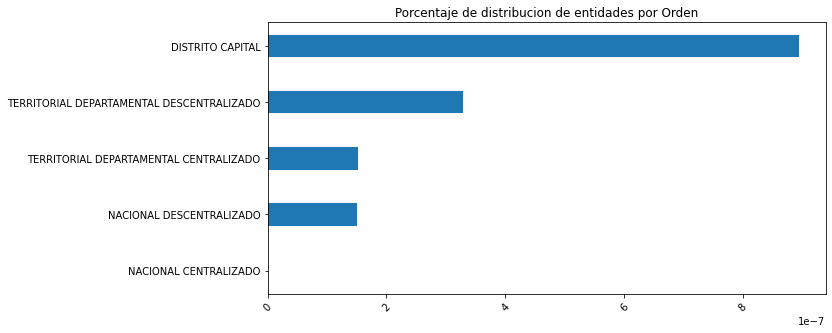

In [8]:
fig = plt.figure(figsize=(10,5));
pos = [2*i for i in range(1,6)]
plt.barh(pos,np.flip(orden["Orden Entidad"])/len(df),
         tick_label=np.flip(orden.index));
plt.xticks(rotation=45);
plt.title("Porcentaje de distribucion de entidades por Orden")

In [9]:
print("Porcentaje de datos por Tipo de proceso:")
df["Tipo de Proceso"].value_counts()/len(df)

Porcentaje de datos por Tipo de proceso:


Contratación Directa (Ley 1150 de 2007)                                                  0.545963
Régimen Especial                                                                         0.404379
Contratación Mínima Cuantía                                                              0.023334
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)                                  0.008529
Licitación Pública                                                                       0.006307
Subasta                                                                                  0.006241
Concurso de Méritos Abierto                                                              0.003970
Contratos y convenios con más de dos partes                                              0.000884
Licitación obra pública                                                                  0.000117
Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007    0.000113
Concurso de Méritos 

In [10]:
print("Porcentaje de datos por Estado de proceso:")
df["Estado del Proceso"].value_counts()/len(df)

Porcentaje de datos por Estado de proceso:


Celebrado                                              0.740695
Liquidado                                              0.131686
Convocado                                              0.059014
Terminado sin Liquidar                                 0.057771
Terminado Anormalmente después de Convocado            0.007569
Adjudicado                                             0.001756
Borrador                                               0.000745
Descartado                                             0.000730
Lista Corta                                            0.000014
Expresión de Interés                                   0.000014
Publicación para manifestaciones de interés            0.000003
Finalizado el plazo para manifestaciones de interés    0.000003
Name: Estado del Proceso, dtype: float64

In [11]:
print("Porcentaje de datos por Tipo de contrato:")
df["Tipo de Contrato"].value_counts()/len(df)

Porcentaje de datos por Tipo de contrato:


Prestación de Servicios    0.828596
Suministro                 0.065755
Otro Tipo de Contrato      0.034829
Compraventa                0.028339
Obra                       0.023089
Arrendamiento              0.008924
Interventoría              0.004166
Consultoría                0.003113
Comodato                   0.002549
Acuerdo Marco              0.000261
Concesión                  0.000145
Fiducia                    0.000093
Crédito                    0.000088
No definido                0.000038
Agregación de Demanda      0.000015
Name: Tipo de Contrato, dtype: float64

In [12]:
objetos = pd.DataFrame(df["Objeto a Contratar"].value_counts())

In [13]:
dic_obj = dict()
cods_obj = range(1,len(objetos)+1)
for k in cods_obj:
    dic_obj[k] = objetos.index[k-1]
dic_obj

{1: 'Servicios de Gestion, Servicios Profesionales de Empresa y Servicios Administrativos',
 2: 'Servicios de Salud',
 3: 'Servicios Educativos y de Formación',
 4: 'Servicios Públicos y Servicios Relacionados con el Sector Público',
 5: 'Servicios de Edificación, Construcción de Instalaciones y Mantenimiento',
 6: 'Servicios Personales y Domésticos',
 7: 'Servicios Basados en Ingeniería, Investigación y Tecnología',
 8: 'Equipos de Oficina, Accesorios y Suministros',
 9: 'Terrenos, Edificios, Estructuras y Vías',
 10: 'Instrumentos Musicales, Juegos, Artes, Artesanías y Equipo educativo, Materiales, Accesorios y Suministros',
 11: 'Servicios Editoriales, de Diseño, de Artes Graficas y Bellas Artes',
 12: 'Equipo Médico, Accesorios y Suministros',
 13: 'Servicios de Transporte, Almacenaje y Correo',
 14: 'Servicios Medioambientales',
 15: 'Servicios de Viajes, Alimentación, Alojamiento y Entretenimiento',
 16: 'Difusión de Tecnologías de Información y Telecomunicaciones',
 17: 'Servici

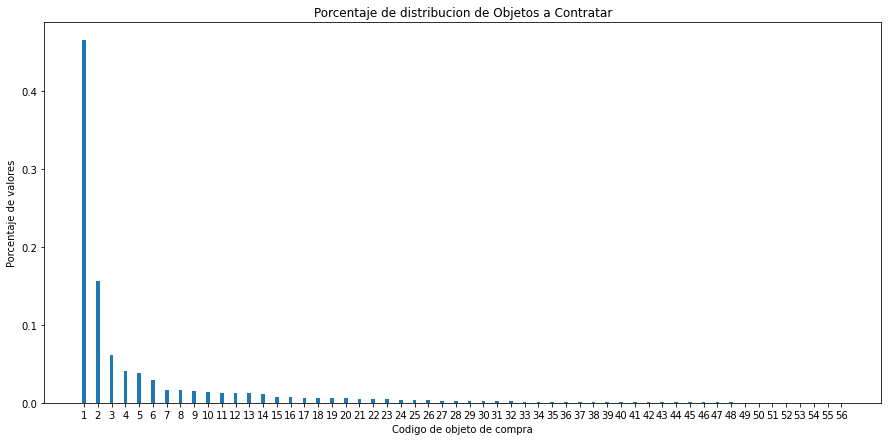

In [14]:
fig = plt.figure(figsize=(15,7));
pos = [3*i for i in range(1,len(objetos)+1)]
plt.bar(pos,objetos["Objeto a Contratar"]/len(df),
         tick_label=cods_obj);
plt.title("Porcentaje de distribucion de Objetos a Contratar");
plt.xlabel("Codigo de objeto de compra");
plt.ylabel("Porcentaje de valores");

In [15]:
df["Regimen de Contratacion"].value_counts()

Estatuto General de Contratación    388731
Régimen Especial                    267069
Ley 80 de 1993                         180
Name: Regimen de Contratacion, dtype: int64

In [16]:
print("Porcentaje de registros sobre Origen de los recursos:")
df["Origen de los Recursos"].value_counts()/len(df)

Porcentaje de registros sobre Origen de los recursos:


No definido                                                                                     0.818825
Recursos propios                                                                                0.075468
Sistema General de Participaciones - SGP                                                        0.052486
Presupuesto Nacional/Territorial                                                                0.036768
Presupuesto General de la Nación  PGN                                                          0.006500
Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)                              0.003567
Recursos de crédito                                                                             0.002788
Otros recursos                                                                                  0.002654
Sistema General de Regalías - SGR                                                               0.000610
Regalías                                               

## Identificación y preprocesamiento de variables
- Las variables *Orden Entidad, Tipo de Proceso, Estado de Proceso, Regimen de Contratacion, Objeto a Contratar, Tipo de Contrato* y *Origen de los Recursos* son **variables categóricas** con información textual.

- Las variables *Cuantia Contrato, Tiempo Adiciones en Dias, Tiempo Adiciones en Meses, Valor Total de Adiciones, Valor Sancion* son **variables numéricas** de la base de datos.

- Las variables *Marc Adiciones* y *Marc Sancion* son **outputs de interés**. Puede que **Marc Adiciones** también sea input y la única variable de salida de los modelos sea *Marc Sancion*.

- Se creará una sola columna que indique el tiempo en adiciones en días:
    - Si *Rango Ejec del Contrato* en días (D) entonces se usa ese valor
    - Si *Rango Ejec del Contrato* en días (M) entonces, asumiendo que cada día sea de 30 meses se calcula $30m + d$ donde $m$ es el tiempo adicionado en meses y $d$ el tiempo adicionado en días

In [17]:
# Usar OneHotEncoder
cat_cols = ["Orden Entidad","Tipo de Proceso","Estado del Proceso",
           "Regimen de Contratacion","Objeto a Contratar","Tipo de Contrato",
           "Origen de los Recursos"]
print("Numero de Nans por columna:")
print([(cat_cols[i], df[cat_cols[i]].isna().sum()) for i in range(len(cat_cols))])
#enc = preprocessing.OneHotEncoder(handle_unknown="ignore")
#enc.fit(df[])

Numero de Nans por columna:
[('Orden Entidad', 0), ('Tipo de Proceso', 0), ('Estado del Proceso', 0), ('Regimen de Contratacion', 4), ('Objeto a Contratar', 0), ('Tipo de Contrato', 0), ('Origen de los Recursos', 0)]


In [18]:
#null_rows = df.index[pd.isnull(df["Regimen de Contratacion"])]
#df.iloc[null_rows,:]
df[pd.isnull(df["Regimen de Contratacion"])]

,Orden Entidad,Tipo de Proceso,Estado del Proceso,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,Nombre Grupo,Tipo Identifi del Contratista,Rango de Ejec del Contrato,Cuantia Contrato,Origen de los Recursos,Marc Adiciones,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Valor Total de Adiciones,Marc Sancion,Valor Sancion,Regimen de contratacion
123225,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Finalizado el plazo para manifestaciones de in...,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
410080,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Publicación para manifestaciones de interés,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
472437,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Publicación para manifestaciones de interés,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan
492844,DISTRITO CAPITAL,Iniciativa Privada sin recursos públicos,Finalizado el plazo para manifestaciones de in...,NaN,"Terrenos, Edificios, Estructuras y Vías",No definido,"[G] Terrenos, Edificios, Estructuras y vías",No Definido,N,0.0,No definido,0,0,0,0.0,0,0.0,nan


Se pueden descartar esas filas ya que son muy pocas y no tienen información relevante.

In [21]:
df = df[~pd.isnull(df["Regimen de Contratacion"])]

# Modelos
Los  modelos de clasificación que se probarán son:
1. K-Nearest Neighbors
2. Modelos Bayesianos
3. SVM

Cada uno de estos modelos se probará utilizando como inputs y outputs las variables de la siguiente manera:
1. **Inputs**: categóricas (textuales), Marc Adiciones y variables numéricas, **Output**: Marc Sancion
2. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Sancion
3. **Inputs**: categóricas (textuales), variables numéricas, **Output**: Marc Adiciones

**Nota:** hay que manejar con cuidado el desbalance de las proporciones de los datos, de lo contrario los modelos quedan sesgados

In [22]:
df.columns

Index(['Orden Entidad', 'Tipo de Proceso', 'Estado del Proceso',
       'Regimen de Contratacion', 'Objeto a Contratar', 'Tipo de Contrato',
       'Nombre Grupo', 'Tipo Identifi del Contratista',
       'Rango de Ejec del Contrato', 'Cuantia Contrato',
       'Origen de los Recursos', 'Marc Adiciones', 'Tiempo Adiciones en Dias',
       'Tiempo Adiciones en Meses', 'Valor Total de Adiciones', 'Marc Sancion',
       'Valor Sancion', 'Regimen de contratacion'],
      dtype='object')

In [ ]:
def plotCM(ytrue, ypred, titulo, clases=None, normalize = False, ax = None):
    """ Funcion para calcular y visualizar la matriz de confusion"""
    
    if clases == None:
        clases = list(set(ytrue))
        clases.sort() # etiquetas unicas ordenadas alfabeticamente
    
    CM = confusion_matrix(ytrue,ypred, labels=clases)
    
    #Normaliza la matriz de confusion dividiendo cada fila por el total de verdaderos
    if normalize:
        CM = 100*CM / CM.sum(axis=1).reshape(-1,1) #Aprovechando el Broadcasting!
 
    df = pd.DataFrame(CM, index=clases, columns=clases)
    df.index.name = 'True'; df.columns.name = 'Predicted'
    
    sns.heatmap( df, # Visualizando la matriz de confusion
             annot=True, fmt='2.1f', cmap='ocean_r',cbar=False,square=True, annot_kws={'fontsize':16}, ax=ax )
    plt.title(titulo)
    plt.show()

---
# Análisis de correlaciones entre Inputs y Output
## Ayudas
- Test chi cuadrado
- Cramers'V
- Bonferroni Correction

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Columnas con texto categoricas
# ['Orden Entidad','Tipo de Proceso','Estado del Proceso','Regimen de Contratacion','Objeto a Contratar','Tipo de Contrato','Origen de los Recursos']
#Transformación de texto a codigos con OneHotencoder
enc = OneHotEncoder()
enc.fit(df[cat_cols])
# enc.categories: arreglo con nombre de categorias porcolumna

OneHotEncoder()

In [44]:
# Diccionario de diccionarios de codigos para cada columna categorica
dic_cods = dict()
for i in range(len(enc.categories_)):
    d = dict()
    for j in range(len(enc.categories_[i])):
        d[enc.categories_[i][j]] = j
    dic_cods[cat_cols[i]] = d

In [45]:
from copy import deepcopy

In [56]:
# Reemplazando texto por codigos
df_cod = deepcopy(df)
for name in cat_cols:
    df_cod = df_cod.replace({name:dic_cods[name]})

In [58]:
# df_cod es el mismo dataset pero con las variables categoricas codificadas
df_cod.head()

,Orden Entidad,Tipo de Proceso,Estado del Proceso,Regimen de Contratacion,Objeto a Contratar,Tipo de Contrato,Nombre Grupo,Tipo Identifi del Contratista,Rango de Ejec del Contrato,Cuantia Contrato,Origen de los Recursos,Marc Adiciones,Tiempo Adiciones en Dias,Tiempo Adiciones en Meses,Valor Total de Adiciones,Marc Sancion,Valor Sancion,Regimen de contratacion
0,0,9,2,2,54,11,"[G] Terrenos, Edificios, Estructuras y vías",Nit de Persona Jurídica,D,4990600.0,11,0,0,0,0.0,0,0.0,Régimen Especial
1,0,9,2,2,43,13,[F] Servicios,Nit de Persona Jurídica,M,2518660.0,1,0,0,0,0.0,0,0.0,Régimen Especial
2,2,4,2,0,47,13,[F] Servicios,Cédula de Ciudadanía,M,62400000.0,1,0,0,0,0.0,0,0.0,Estatuto General de Contratación
3,4,9,2,2,51,13,[F] Servicios,Cédula de Ciudadanía,D,1060200.0,1,0,0,0,0.0,0,0.0,Régimen Especial
4,0,4,2,0,41,13,[F] Servicios,Nit de Persona Natural,D,2317005.0,1,0,0,0,0.0,0,0.0,Estatuto General de Contratación


# 1. Inputs textuales + Marc_sancion, output: Marc Sancion

## 1.1 Análisis de correlación inputs categóricos y output Marc Sancion categorico
La correlación entre dos variables categóricas se puede medir con las siguientes técnicas: **test chi cuadrado, Cramers's V**.\
Primero analicemos analicemos con el test de Chi cuadrado.

In [80]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [97]:
def chi2_test(var1,var2,prob=0.95):
    """
    Determina si 2 variables categoricas tienen algún tipo de correlacion con test de chi cuadrado
    args:
        var1: variable 1
        var2: variable 2
        prob: nivel de confianza para test, por defecto 95%
    returns:
        metricas de test
    """
    table = pd.crosstab(var1,var2)
    # Estadistico cho2, p-valor, grados de libertad estimados y frecuencias estimadas
    # basado en sumas marginales de la tabla
    stat,p,dof,expected = chi2_contingency(table)
    print("Degrees of freedom (Dof): ", dof)
    #print(expected)
    #prob = 0.95
    # Percent point function, inverse distribution function
    # Calcula probabilidad que la variable sea menor o igual que x dado un x
    # interpret statistic
    critical=chi2.ppf(prob,dof)
    print("Probability = %.3f, critical = %.3f, stat = %.3f" % (prob,critical,stat))
    if abs(stat) >=critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    # interpet p-value
    alpha = 1.0-prob
    print("Significance = %.3f, p-value = %.3f" % (alpha,p))
    if p <=alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")

### Entre Orden Entidad y Marc Sancion

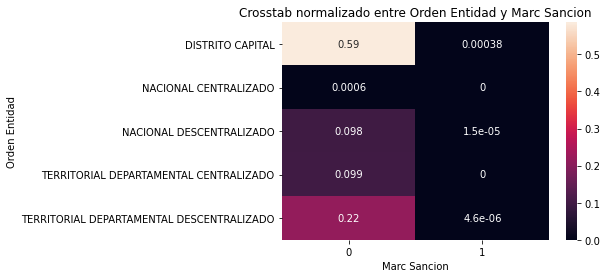

In [94]:
col1 = "Orden Entidad"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df[col1],df[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [78]:
table = pd.crosstab(df["Orden Entidad"],df["Marc Sancion"])
table

Marc Sancion,0,1
Orden Entidad,,
DISTRITO CAPITAL,384544,251
NACIONAL CENTRALIZADO,392,0
NACIONAL DESCENTRALIZADO,64398,10
TERRITORIAL DEPARTAMENTAL CENTRALIZADO,65154,0
TERRITORIAL DEPARTAMENTAL DESCENTRALIZADO,141228,3


In [98]:
chi2_test(df["Orden Entidad"],df["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  4
Probability = 0.950, critical = 9.488, stat = 146.898
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)


### Entre tipo de Proceso y Marc Sancion

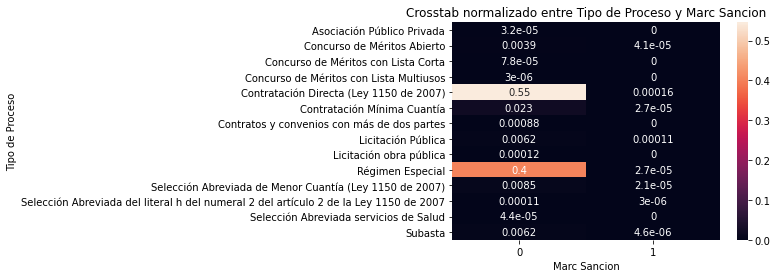

In [95]:
col1 = "Tipo de Proceso"
col2 = "Marc Sancion"
sns.heatmap(pd.crosstab(df[col1],df[col2],normalize=True),annot=True);
plt.title("Crosstab normalizado entre "+col1+ " y "+col2);

In [99]:
table = pd.crosstab(df["Tipo de Proceso"],df["Marc Sancion"])
chi2_test(df["Tipo de Proceso"],df["Marc Sancion"],prob=0.95)

Degrees of freedom (Dof):  13
Probability = 0.950, critical = 22.362, stat = 4173.681
Dependent (reject H0)
Significance = 0.050, p-value = 0.000
Dependent (reject H0)
